<a href="https://colab.research.google.com/github/Paavani-git/Computer_vision/blob/main/CV_Labsheet_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 19ECE384 Computer Vision Programming Lab
## Labsheet #3
## Spatial Filtering of Images
Name: Poluru Pavani

Roll Number:AM.EN.U4EAC19041

-----

Spatial filtering of images refers to the intensity transformation applied directly on the spatial domain (i.e., intensity values) of images. These transformations can be often interpreted as a 2-D convolution between the input image to be transformed, and a 2-D convolution kernel (convolution kernel is similar to the impulse response used in the 1-D convolution). As convolution in the time domain (spatial domain in the case of images) is equivalent to a frequency selective filtering in the frequency domain, the name __filtering__ naturally appears. The simplest form of intensity transformations that you have already studied in power-law and logarithmic transformations can be interpreted as spatial filtering with appropriate convolution kernels. Hence, spatial filtering is more general, and it includes the simple intensity transformations that you have already studied. The basic steps involved in spatial filtering is very similar to those used in 1-D convolution, except that, all operations are now carried out in 2-D spatial domain. These steps are summarized in the following figure.

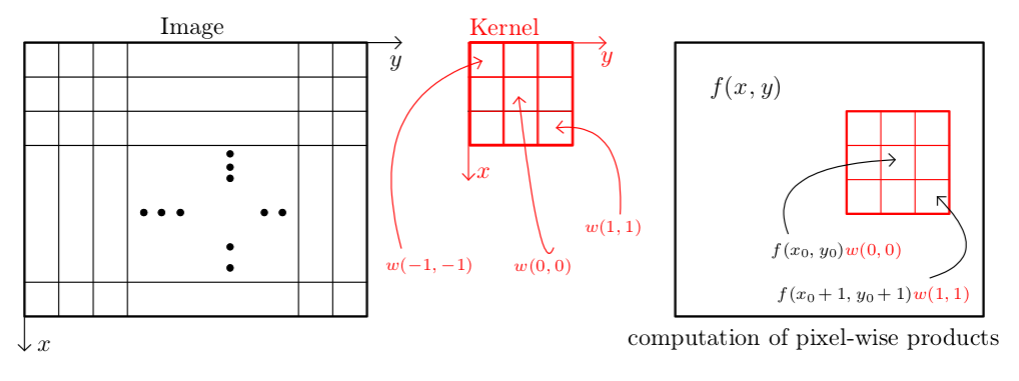

In the above figure, the image to be filtered is shown as a large 2-D array of size $M\times N$, whereas, the convolution kernel is shown as a small 2-D array of size $3 \times 3$. Generally, the convolution kernel will be of much smaller size (such as $3 \times 3$ or $5 \times 5$) when compared to the size of the image. Similarly, in practice, 2-D convolution applied on images produces a filtered image of same size, or sometimes even smaller size (because, boundary pixels are sometimes excluded), than the size of the input image. The pixel value at a location $(x_0,y_0)$ of the output image is computed by using the pixels from a neighborhood centered around $(x_0,y_0)$ in the input image. The size of the neighborhood (often $3\times 3$ or $5 \times 5$) is same as that of the convolution kernel. Assuming a $3 \times 3$ kernel $w(x,y)$ whose values are as shown above, the pixel value at an arbitrary location $(x_0,y_0)$ of the output image $g(x,y)$is computed by using the pixel values from a $3 \times 3$ neighborhood centered around $(x_0,y_0)$ in the input image $f(x,y)$ as,
$$g(x_0,y_0) = \sum_{i=-1}^{1}\sum_{j=-1}^{1}f(x_0-i,y_0-j)w(i,j)$$
Note the similarity between the above equation and the convolution sum of 1-D signals that you have previously studied. The above equation can be interpreted as, computing the output pixel value at any $(x_0,y_0)$ by placing the convolution kernel on top of input image, centered around $(x_0,y_0)$ in the form of a mask, and then computing the sum of pixel-wise products of input image and the convolution kernel. Hence, in the case of spatial domain filtering, the convolution kernel is often called a mask. 

The 2-D convolution on images causes a frequency selective filtering effect in the frequency domain. In order to understand this effect, let us first look at the concept of frequency in the case of images. As you have studied before, the frequencies of a time domain signal give the information about how fast or slow the signal amplitude changes. A sudden change in amplitude corresponds to a high frequency information and vice-versa. In the case of images, time axis is replaced by spatial coordinates (distances along $x$ and $y$ directions), and the signal amplitude is the pixel intensity value. Hence, a sharp change in the pixel intensity values corresponds to a high frequency information, and smooth changes correspond to relatively low frequency information. Note that, a sudden change in pixel values (say a sudden change from 0 to 255) appear as edges and corners in the images as shown below. In the case of spatial domain filtering, different masks produce different filtering effects. In the following exercises, we study the effect of spatial domain filtering with different convolution kernels.

### Exercise 1. Image Smoothing
Image smoothing corresponds to a low pass filtering. It filters out the high frequency information, and retains only the low frequency information. As a result, high frequency contents such as edges and corners present in the images are blurred out, whereas, image areas with smooth changes in intensity values will remain unaffected. Smoothing can be achieved by averaging the pixel values around a neighborhood. Hence, the pixel value at any location $(x_0,y_0)$ in the output image is computed as the average of pixel values from a neighborhood around $(x_0,y_0)$ in the input image. This corresponds to evaluating the above convolution sum with a mask as shown below. Note that, the following mask values result in the convolution sum given as,
$$g(x,y)=\frac{1}{9}\sum_{i=-W}^{W}\sum_{i=-W}^{W}f(x,y),$$
where, $W$ depends on the size of the mask, i.e., $W = \displaystyle\frac{\textrm{No. of rows/columns of the mask-1}}{2}$ (assuming a square mask).


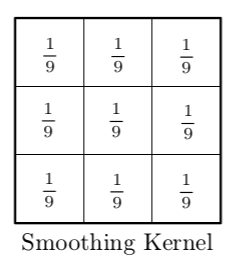

#### Steps
1. Read the input image to be filtered, and convert the pixel values from 8 bit unsigned integer values to floating point values.
1. Initialize the output image with size $(M-2W)\times (N-2W)$, where, $M$ and $N$ are the number of rows and columns of the input image respectively.
2. ```for m = W to M-W; for n = W to N-W```   
      Extract a $(2W+1\times 2W+1)$ slice $f(m-W:m+W,n-W:n+W)$ of the input image.    
      Compute the sum of pixel-wise products of the above slice and the mask.   
      Store the above sum at location $(m-W,n-W)$ of the output image, i.e., $g(m-W,n-W)$.    
      ```end; end;```
3. Normalize the result image with the max value and then convert the range to [0,255].

An example input image and the corresponding smoothed image are shown below. Write your code for smoothing an input image in the following code cell. Use an image different from the one shown as example. Repeat the smoothing experiment with $3 \times 3$ and $5 \times 5$ masks.

#### Input Image
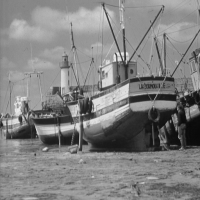

#### Output Image
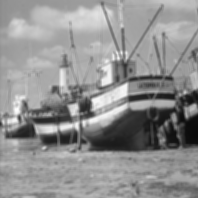

In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


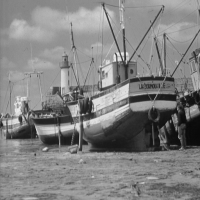



200 200


In [ ]:

I = cv2.imread('/content/gdrive/MyDrive/Computer vision/boat.png',0); 
cv2_imshow(I)
print("\n")
m,n = I.shape
print(m,n)

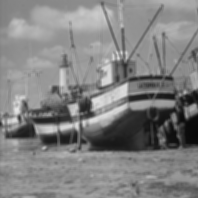

In [ ]:
# Write your code for smoothing filter here...
w = 1
J = np.zeros((I.shape[0]-2,I.shape[1]-2));
mask = np.array([[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]]);
for i in range (w,m-w):
  for j in range (w,n-w):
    slc = I[i-1:i+2,j-1:j+2];
    J[i-1,j-1] = np.sum(np.multiply(slc,mask));

cv2_imshow(J)

### Exercise 2. Image Sharpening using Laplacian
Image sharpening filters are used to enhance the possibly blurred details of an image. Image sharpening filters highlight the high frequency details of an image, and hence can be seen as high pass filters. As low pass filtering is achieved through averaging, which is analogous to integration in continuous domain, it is natural to think of differentiation for the opposite. The differentiation process amplify the discontinuities (high frequency details) of a function, and hence it can be utilized for image shapening. In practice, images are discrete 2-D signals, and we use discretized versions of differentiation for image sharpening. Depending on the order of derivative to be used, and the method used for discretizing the differentiation process, there exist a wide variety of masks as sharpening filters. Each of these masks implement some form of differentiation for enhancing the image details.

The Laplacian of a 2-D function $f(x,y)$ involves second order partial derivatives, and it can be evaluated at a point $(x,y)$ as,
$$\nabla^2f(x,y)=\frac{\partial^2f(x,y)}{\partial x^2}+\frac{\partial^2f(x,y)}{\partial y^2},$$
where, $\displaystyle\frac{\partial^2(.)}{\partial r^2}$ denotes the second partial derivative along $r$, for $r=x,y$. The discretized form the above Laplacian can be written as (Refer the book by Gonzales for details),
$$\nabla^2 f(x,y)=\left[f(x+1,y)+f(x-1,y)+f(x,y+1)+f(x,y-1)\right]-4f(x,y).$$
The convolution mask corresponding to the above discretized Laplacian is shown below. The convolution of an input image with the following mask produces a result that contains (only) the high frequency details of the image. These details can be __added back__ to the original input image for enhancing the details.

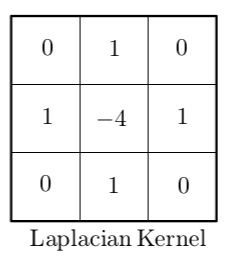

#### Steps
1. Execute all the steps given in Exercise 1, by replacing the mask with the one shown above. The output of this step will be the image $h(x,y)$ that contains only the details.
2. Compute the sharpened image as $g(x,y) = f(x,y)-h(x,y)$, where, $f(x,y)$ is the original input image.

Though we subtract the detail image from the input image, note that, it actually performs an addition, because, the derivative at a spatial location  increases in the negative direction when the corresponding pixel value is large when compared to the neighborhood values (see the discretized Laplacian given above).

An example input image and the corresponding sharpened image are shown below. Write your code for sharpening an input image using Laplacian in the following code cell. Use an image different from the one shown as example.

#### Input Image
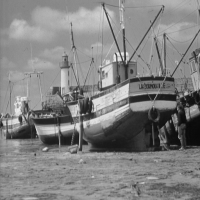

#### Sharpened Image
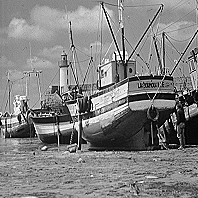

Image of h(x,y):


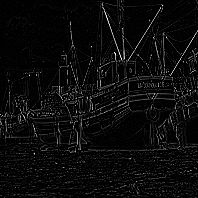

Final sharpened image


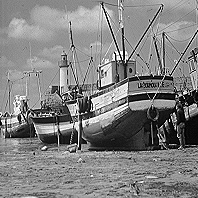

In [ ]:
# Write your code for image sharpening here...
w = 1
h = np.zeros((I.shape[0]-2,I.shape[1]-2));
mask = np.array([[0,1,0],[1,-4,1],[0,1,0]]);
for i in range (w,m-w):
  for j in range (w,n-w):
    slc = I[i-1:i+2,j-1:j+2];
    h[i-1,j-1] = np.sum(np.multiply(slc,mask));
print("Image of h(x,y):")
cv2_imshow(h)

g = np.zeros((I.shape[0]-2,I.shape[1]-2));
for i in range (0,I.shape[0]-2):
  for j in range (0,I.shape[0]-2):
    g[i][j] = J[i][j] - h[i][j]
print("Final sharpened image")
cv2_imshow(g)

### Exercise 3. The Sobel filter
The Sobel filters compute an approximate version of the gradient $\nabla f(x,y)$ of the image $f(x,y)$ given as,
$$\nabla f(x,y)=\begin{bmatrix}G_x\\
G_y
\end{bmatrix}=\begin{bmatrix}\frac{\partial f}{\partial x}\\
\frac{\partial f}{\partial y}
\end{bmatrix},$$
where, $G_r$ denotes the gradient along $r$, for $r=x,y$. In contrast with the Laplacian filter, note that the Sobel filters utilize first order derivatives. The discretized version of the above gradient can be obtained by convolving the input image $f(x,y)$ separately with two different masks shown below, and then adding the results. The following masks are called Sobel operators or Sobel filters.

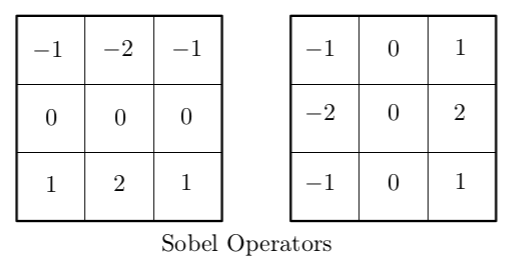

#### Steps
1. Execute all the steps of Exercise 1 with the first mask shown above.
2. Execute all the steps of Exercise 1 with the second mask shown above.
3. Compute the gradient image (output) by adding the results of steps 1 and 2 given above.

An example input image and the corresponding gradient image are shown below. Write your code for computing the gradient of an input image in the following code cell. Use an image different from the one shown as example.

#### Input Image
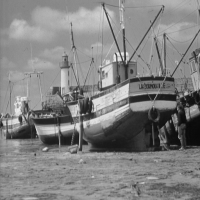

#### Gradient
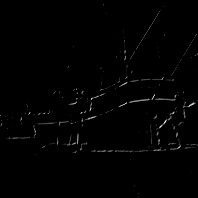

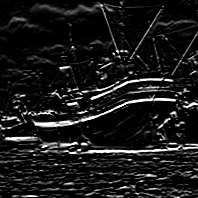

In [ ]:
# Write your code for computing the gradient of an image here...


w = 1
Xg = np.zeros((I.shape[0]-2,I.shape[1]-2));
mask = np.array([[-1,-2,-1],[0,0,0],[1,2,1]]);
for i in range (w,m-w):
  for j in range (w,n-w):
    slc = I[i-1:i+2,j-1:j+2];
    Xg[i-1,j-1] = np.sum(np.multiply(slc,mask));

cv2_imshow(Xg)

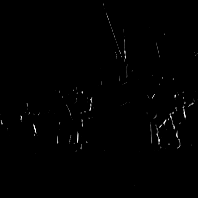

In [ ]:
w = 1
Yg = np.zeros((I.shape[0]-2,I.shape[1]-2));
mask = np.array([[-1,0,-1],[-2,0,2],[-1,0,1]]);
for i in range (w,m-w):
  for j in range (w,n-w):
    slc = I[i-1:i+2,j-1:j+2];
    Yg[i-1,j-1] = np.sum(np.multiply(slc,mask));

cv2_imshow(Yg)

Gradient image


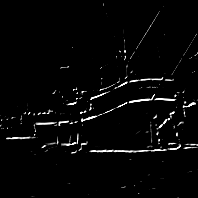

In [ ]:
grad = np.zeros((I.shape[0]-2,I.shape[1]-2));
for i in range (0,I.shape[0]-2):
  for j in range (0,I.shape[0]-2):
    grad[i][j] = Xg[i][j] + Yg[i][j]
print("Gradient image")
cv2_imshow(grad)